# **Sebastian Ramos and Tomas Vera Music Recommendation Project**

In this project, we created a Python program that recommends music recordings based on their similarity to a reference (query) recording. Our recommendation function follows the following format:


def MusicRecommender(queryfilename, Nrecommendations)

where

queryfilename = path and filename of a single query recording

Nrecommendations = number of recommendations to return (you can assume this is a number between 1 and 5)

Project datafiles provided by Yon Visell



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import essentia.standard as es
import IPython as ipy

In [22]:
import glob

#load files into dictionary with key value corresponding to genre
mediaDir = './music_dataFolder'
files = {}
files['classical'] = glob.glob(mediaDir + '/classical/'+'*.wav')
files['jazz'] = glob.glob(mediaDir + '/jazz/'+'*.wav')
files['rockblues'] = glob.glob(mediaDir + '/rockblues/'+'*.wav')

classical_names = [file.split('/')[-1] for file in files['classical']]
jazz_names = [file.split('/')[-1] for file in files['jazz']]
rockblues_names = [file.split('/')[-1] for file in files['rockblues']]

song_names = classical_names + jazz_names + rockblues_names

Fs = 44100
Ts = 1/Fs 

print(files)

{'classical': ['./music_dataFolder/classical/classical1.wav', './music_dataFolder/classical/classical2.wav', './music_dataFolder/classical/classical.wav', './music_dataFolder/classical/copland.wav', './music_dataFolder/classical/copland2.wav', './music_dataFolder/classical/vlobos.wav', './music_dataFolder/classical/brahms.wav', './music_dataFolder/classical/debussy.wav', './music_dataFolder/classical/bartok.wav'], 'jazz': ['./music_dataFolder/jazz/ipanema.wav', './music_dataFolder/jazz/duke.wav', './music_dataFolder/jazz/moanin.wav', './music_dataFolder/jazz/russo.wav', './music_dataFolder/jazz/jazz1.wav', './music_dataFolder/jazz/mingus1.wav', './music_dataFolder/jazz/tony.wav', './music_dataFolder/jazz/misirlou.wav', './music_dataFolder/jazz/corea1.wav', './music_dataFolder/jazz/beat.wav', './music_dataFolder/jazz/georose.wav', './music_dataFolder/jazz/caravan.wav', './music_dataFolder/jazz/bmarsalis.wav', './music_dataFolder/jazz/mingus.wav', './music_dataFolder/jazz/unpoco.wav', '.

# Feature Extraction and Normalization

The recomendation engine compares the similarity between the query song and the database songs of the following feature set:


1.   Mean Spectral Centroid
2.   Standard Deviation of RMS Amplitude
3.   Mean Spectral Rolloff
4.   Mean Spectral Flatness

For each feature in the feature set, we normalize the feature vector to give equal weight to the selected feature, F, as shown:

$F_{Norm}=\frac{F_{Val} - F_{Mean}}{F_{std}}$


## Mean Spectral Centroid

The magnitude spectrum variation of the spectral centroid is calculated in order to determine the average frequency in which the weighted spectrum resides.
The average of the spectral centroids for each block is determined for each audio file as shown:

$v_{SC,block}(i)=\frac{\sum_{k=0}^{block\_size-1} k|X(i,k)|}{\sum_{k=0}^{block\_size-1} |X(i, k)|}$

<br>

$v_{SC,mean}=\frac{\sum_{i=0}^{n\_blocks-1} v_{SC,block}(i)}{n\_blocks}$

In [23]:
def calculate_mean_spectral_centroid(song):
  #get number of samples for the current audio recording
  n_samples = song.shape[0]

  #define basic parameters for block based analysis of recording
  block_size = 100000 
  overlap = 0.25  #25% overlap between blocks
  block_step = (1-overlap)*block_size  
  n_blocks = np.ceil(n_samples/block_step)

  #initialize zero np array to store spectral centroid for each block
  centroid_list = np.zeros(int(n_blocks))

  #loop through all predefined blocks of audio recording
  for i in range(int(n_blocks)):

    #calculate start and end sample step for current block
    block_s = int(i*block_step)
    block_e = int(min(block_s + block_size, n_samples))

    #calculate audio data for the specific block
    block = song[block_s:block_e]

    #define number of samples for the current block
    Nsamples = block.shape[0]

    ff = np.arange(0,int(Fs),Fs/Nsamples)

    #calculate the fast fourier transform for the current block
    block_fft = np.abs(np.fft.fft(block))

    #only display half of the samples of the audio file for better FFT graph plot
    ff = ff[:int(Nsamples/2)]
    block_fft = block_fft[:int(Nsamples/2)]

    #calculate current block's spectral centroid
    centroid_list[i] = np.sum(ff*block_fft)/np.sum(block_fft)

  #take the mean of all of the audio file's block centroids and round to two decimal places
  mean_spectral_centroid = round(np.mean(centroid_list), 2)

  return mean_spectral_centroid

In [24]:
#define dictionary for calculated mean spectral centroid values for each genre
mean_spectral_centroids = {
    'classical': [],
    'jazz': [],
    'rockblues': []
}

#loop through dictionary of audio recording genres
for k, v in files.items():

  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    mean_centroid_for_file = calculate_mean_spectral_centroid(song)

    #print the mean spectral centroid for current file
    print(f'{mean_centroid_for_file} Hz')

    #append the mean spectral centroid to the genre mean spectral centroid dictionary
    mean_spectral_centroids[k].append(mean_centroid_for_file)
    
#print the dictionary of spectral centroids
print(mean_spectral_centroids)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
1440.18 Hz

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
1446.49 Hz

-----classical file 3-----
./music_dataFolder/classical/classical.wav
1607.0 Hz

-----classical file 4-----
./music_dataFolder/classical/copland.wav
1872.75 Hz

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
1471.75 Hz

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
1450.13 Hz

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
1226.17 Hz

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
1528.46 Hz

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
1826.7 Hz

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
2404.56 Hz

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
1473.18 Hz

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
1584.5 Hz

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav
1921.62 Hz

--

Feature mean subtraction and normalization by the standard deviation

In [25]:
centroids = []

# Placing mean spectral centroid values into a single continuous list
for genre in mean_spectral_centroids.keys():
  for value in mean_spectral_centroids[genre]:
    centroids.append(value)

# Finding the mean and standard deviation of the list of spectral centroids
mean_of_centroids = np.round(np.mean(centroids), 2)
std_of_centroids = np.round(np.std(centroids), 2)

# The spectral centroid values are normalized using mean subtraction and normalization
centroid_norm_list = np.round((centroids - mean_of_centroids) / std_of_centroids, 3)

print(centroid_norm_list)

[-1.171 -1.157 -0.808 -0.229 -1.102 -1.149 -1.637 -0.979 -0.329  0.929
 -1.099 -0.857 -0.123  1.081 -0.513  0.754 -0.425 -0.612  0.602  1.427
 -1.651  0.834 -0.425  0.993 -0.259 -1.661  1.284 -0.225  0.248  1.551
  0.385  1.091  1.514  0.653  1.457  1.29   0.32 ]


## Standard Deviation of RMS Amplitude

The standard deviation of the RMS amplitude of each block is determined in order to analyze the variation of the frequency components around the average frequency magnitude. It is calculated by the following:

$v_{RMS,block}(i)=20log_{10}(\sqrt{\frac{\sum_{k=0}^{block\_size-1} |X(i, k)|^2}{block\_size}})$

<br>

$v_{RMS,SD}=\sqrt{\frac{\sum_{i=0}^{n\_blocks-1} (v_{RMS,block}(i) - v_{RMS,mean})^2}{n\_blocks}}$

In [26]:
def calculate_std_rms_amp(song):
 #get number of samples for the current audio recording
  n_samples = song.shape[0]

  #define basic parameters for block based analysis of recording
  block_size = 100000
  overlap = 0.25 #25% overlap between blocks
  block_step = (1-overlap)*block_size
  n_blocks = np.ceil(n_samples/block_step)

  #initialize zero np array to store RMS amplitude for each block
  rms_amp = np.zeros(int(n_blocks))

  #loop through all predefined blocks of audio recording
  for i in range(int(n_blocks)):

    #calculate start and end sample step for current block
    block_s = int(i*block_step)
    block_e = int(min(block_s + block_size, n_samples))

    #get audio data for the specific block
    block = song[block_s:block_e]

    #define number of samples for the current block
    Nsamples = block.shape[0]

    #calculate RMS amplitude for the current block
    rms = np.sqrt(np.mean(np.square(song[block_s:block_e])))

    #convert RMS amplitude units to decibels
    if rms<0.00001:
      rms = 0.00001
    db_rms = 20*np.log10(rms)

    #add calculated RMS amplitude to list of all block RMS amplitudes
    rms_amp[i] = db_rms
  
  #take the standard diviation of all blocks in the current audio file and round to two decimal places
  output_rms_amp = round(np.std(rms_amp), 2)
  return output_rms_amp

In [27]:
#define dictionary for calculated standard deviation of RMS values for each genre
std_rms_amp = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
}

#loop through dictionary of audio recording genres
for k, v in files.items():
  
  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    std_rms_for_file = calculate_std_rms_amp(song)

    #print the standard deviation for the RMS ampltude of the audio file among all blocks
    print(f'{std_rms_for_file} dB')

    #append the standard deviation for the RMS ampltude of the audio file to the genre standard diviation RMS amplitude dictionary
    std_rms_amp[k].append(std_rms_for_file)
  
#print the dictionary of standard deviation RMS amplitude values among all files in all genres
print(std_rms_amp)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
2.81 dB

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
2.19 dB

-----classical file 3-----
./music_dataFolder/classical/classical.wav
4.2 dB

-----classical file 4-----
./music_dataFolder/classical/copland.wav
1.57 dB

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
3.86 dB

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
2.24 dB

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
3.22 dB

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
5.13 dB

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
2.21 dB

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
2.25 dB

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
1.34 dB

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
2.9 dB

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav
1.76 dB

-----jazz file 5-----
./music_dataFolder

Feature mean subtraction and normalization by the standard deviation

In [28]:
rms_amp = []

# Placing standard deviatrion of the RMS amplitude values into a single continuous list
for genre in std_rms_amp.keys():
  for value in std_rms_amp[genre]:
    rms_amp.append(value)

# Finding the mean and standard deviation of the list of the RMS amplitude values
mean_of_rms_amp = np.round(np.mean(rms_amp), 2)
std_of_rms_amp = np.round(np.std(rms_amp), 2)

# The RMS amplitude values are normalized using mean subtraction and normalization
rms_norm_list = np.round((rms_amp - mean_of_rms_amp) / std_of_rms_amp, 3)

print(rms_norm_list)

[ 0.935  0.435  2.056 -0.065  1.782  0.476  1.266  2.806  0.452  0.484
 -0.25   1.008  0.089 -0.823  1.71  -0.315 -0.677 -0.702 -0.774 -1.105
 -0.605 -1.097  0.911 -0.331 -0.411  0.492 -1.097 -0.927 -0.194 -1.016
  0.508 -0.806 -1.105 -0.597 -0.694 -0.919 -0.992]


## Mean Spectral Rolloff

The mean spectral rolloff is found to determine the bandwidth in which a certain percentage of the frequency spectrum resides. A value of 90% is chosen, and the calculation is implemented as follows:

$v_{SR,block}(i)=m|_{\sum_{k=0}^m|X(i,k)|\text{ = }P\cdot\sum_{k=0}^{block\_size-1}|X(i,k)|}$

<br>

$v_{SR,mean}=\frac{\sum_{i=0}^{n\_blocks-1} v_{SR,block}(i)}{n\_blocks}$

In [29]:
def calculate_spectral_rolloff(song, BW):
#get number of samples for the current audio recording
  n_samples = song.shape[0]

  #define basic parameters for block based analysis of recording
  block_size = 100000
  overlap = 0.25 #25% overlap between blocks
  block_step = (1-overlap)*block_size
  n_blocks = np.ceil(n_samples/block_step)

  #initialize zero np array to store spectral rolloff for each block
  rolloff_list = np.zeros(int(n_blocks))
  rolloff = []

  #loop through all predefined blocks of audio recording
  for i in range(int(n_blocks)):

    #calculate start and end sample step for current block
    block_s = int(i*block_step)
    block_e = int(min(block_s + block_size, n_samples))

    #calculate audio data for the specific block
    block = song[block_s:block_e]

    #define number of samples for the current block
    Nsamples = block.shape[0]

    ff = np.arange(0,int(Fs),Fs/Nsamples)

    #calculate the fast fourier transform for the current block
    block_fft = np.abs(np.fft.fft(block))

    #only display half of the samples of the audio file for more accurate FFT
    ff = ff[:int(Nsamples/2)]
    block_fft = block_fft[:int(Nsamples/2)]

    #sum over the entire block's spectral range of FFT
    total_sum = np.sum(block_fft)


    #variable to hold the accumulated magnitude of the rolloff calculation
    accumilated_mag = 0
    
    #calculate the spectral rolloff of the block
    for increment, value in enumerate(block_fft):
      accumilated_mag += value
      if accumilated_mag >= BANDWIDTH_PERCENTAGE*total_sum:
        rolloff.append(increment)
        break

  #calculate the scaled percentage for the rolloff calculation
  scaled_percentage = np.average(rolloff) / len(block_fft)

  #calculate the rolloff frequency for the audio file, serving as the mean spectral rolloff
  output_spectral_rolloff = round(scaled_percentage * Fs, 2)

  return output_spectral_rolloff

In [30]:
#define dictionary for calculated spectral rolloff values for each genre
spectral_rolloff = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
}

#define the bandwidth percentage when calculating the spectral rolloff
BANDWIDTH_PERCENTAGE = 0.90

#loop through dictionary of audio recording genres
for k, v in files.items():
  
  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    rolloff_freq = calculate_spectral_rolloff(song, BANDWIDTH_PERCENTAGE)

    #print the mean spectral rolloff for the audio file
    print(f'{rolloff_freq} Hz')

    #append the mean spectral rolloff to the dictionary holding the genre spectral rolloffs 
    spectral_rolloff[k].append(rolloff_freq)

#print the dictionary of spectral rolloffs for all genres
print(spectral_rolloff)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
13766.86 Hz

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
12165.68 Hz

-----classical file 3-----
./music_dataFolder/classical/classical.wav
17048.32 Hz

-----classical file 4-----
./music_dataFolder/classical/copland.wav
14536.87 Hz

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
13685.7 Hz

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
12723.16 Hz

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
10509.17 Hz

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
13717.35 Hz

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
16452.46 Hz

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
22320.42 Hz

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
13588.82 Hz

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
14277.89 Hz

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav


Feature mean subtraction and normalization by the standard deviation

In [31]:
rolloff = []

# Placing spectral rolloff values into a single continuous list
for genre in spectral_rolloff.keys():
  for value in spectral_rolloff[genre]:
    rolloff.append(value)

# Finding the mean and standard deviation of the list of the spectral rolloff values
mean_of_rolloff = np.round(np.mean(rolloff), 2)
std_of_rolloff = np.round(np.std(rolloff), 2)

# The spectral rolloff values are normalized using mean subtraction and normalization
spectral_rolloff_norm_list = np.round((rolloff - mean_of_rolloff) / std_of_rolloff, 3)

print(spectral_rolloff_norm_list)

[-1.078 -1.356 -0.509 -0.945 -1.092 -1.259 -1.644 -1.087 -0.612  0.406
 -1.109 -0.99   0.232  1.125 -0.26   0.978 -0.01  -0.008  0.689  2.154
 -1.156  1.269 -0.16   1.156 -0.483 -1.496  1.338 -0.39   0.394  1.155
  0.55   1.061  1.251  0.83  -0.614  1.229  0.442]


## Mean Spectral Flatness

The specral flatness is defined as the ratio of the signal noisiness to signal tonalness. Higher values of spectral flatness would attribute to a noisier spectrum, while lower values will suggest a more tonal spectrum. The logarithmic magnitude spectrum is used:

$v_{SF,block}(i)=\frac{exp(\sum_{i=0}^{block\_size-1} log(|X(i, k)|))}{\sum_{i=0}^{block\_size-1} |X(i, k)|}$

<br>

$v_{SF,mean}=\frac{\sum_{i=0}^{n\_blocks-1} v_{SF,block}(i)}{n\_blocks}$

In [32]:
def calculate_spectral_flatness(song):
#get number of samples for the current audio recording
  n_samples = song.shape[0]

  #define basic parameters for block based analysis of recording
  block_size = 100000
  overlap = 0.25
  block_step = (1-overlap)*block_size
  n_blocks = np.ceil(n_samples/block_step)

  #initialize zero np array to store spectral flatness for each block
  flatness_list = np.zeros(int(n_blocks))
  flatness = []

  #loop through all predefined blocks of audio recording
  for i in range(int(n_blocks)):

    #calculate start and end sample step for current block
    block_s = int(i*block_step)
    block_e = int(min(block_s + block_size, n_samples))

    #calculate audio data for the specific block
    block = song[block_s:block_e]

    #define number of samples for the current block
    Nsamples = block.shape[0]

    ff = np.arange(0,int(Fs),Fs/Nsamples)

    #calculate the fast fourier transform for the current block
    block_fft = np.abs(np.fft.fft(block))

    #only display half of the samples of the audio file to avoid repeating FFT
    ff = ff[:int(Nsamples/2)]
    block_fft = block_fft[:int(Nsamples/2)]

    #calculate log magnitude for the block's FFT
    log_mag = np.log(block_fft)

    #calculate the sum along the entire log magnitude of the FFT
    log_sum = np.sum(log_mag)

    #define exponent section of spectral flatness calculation
    exp = np.exp(1/len(block_fft)*log_sum)

    #calculate the sum along the entire frequency amplitudes of the FFT
    total_sum = np.sum(block_fft)

    #calculate current block's spectral flatness and append to flatness list
    flatness.append(exp / (1/len(block_fft)*total_sum))

  #calculate the mean spectral flatness along all blocks of the audio recording
  output_spectral_flatness = round(np.average(flatness), 6)

  return output_spectral_flatness

In [33]:
#define dictionary for calculated spectral flatness values for each genre
spectral_flatness = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
}

#loop through dictionary of audio recording genres
for k, v in files.items():
  
  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    mean_flatness = calculate_spectral_flatness(song)

    #print the current recording's mean spectral flatness
    print(mean_flatness)

    #append the mean spectral flatness to the genre mean spectral flatness dictionary
    spectral_flatness[k].append(mean_flatness)

#print the dictionary of mean spectral flatness
print(spectral_flatness)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
0.050081

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
0.067264

-----classical file 3-----
./music_dataFolder/classical/classical.wav
0.070513

-----classical file 4-----
./music_dataFolder/classical/copland.wav
0.053465

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
0.050819

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
0.043345

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
0.041181

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
0.050647

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
0.046758

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
0.061072

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
0.044529

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
0.05593

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav
0.070319

-----jazz file 5-----
./mu

Feature mean subtraction and normalization by the standard deviation

In [34]:
flatness = []

# Placing spectral flatness values into a single continuous list
for genre in spectral_flatness.keys():
  for value in spectral_flatness[genre]:
    flatness.append(value)

# Finding the mean and standard deviation of the list of the spectral flatness values
mean_of_flatness = np.round(np.mean(flatness), 2)
std_of_flatness = np.round(np.std(flatness), 2)

# The spectral flatness values are normalized using mean subtraction and normalization
spectral_flatness_norm_list = np.round((flatness - mean_of_flatness) / std_of_flatness, 3)

print(spectral_flatness_norm_list)

[-0.992  0.726  1.051 -0.653 -0.918 -1.665 -1.882 -0.935 -1.324  0.107
 -1.547 -0.407  1.032  0.686  0.053  1.055 -0.437  0.583  0.617  1.532
 -1.115  0.751  0.727  0.929 -1.783  1.222  1.834 -1.532  4.152  1.225
 -0.264  0.591  0.079  1.625 -1.052  0.307 -0.068]


# Music Recommender

Specify the music recommender function. Takes as input a query filename for the selected query song, **queryfilename**, and the number of recommendations that will be provided by the algorithm, **Nrecommendations**.

As our distance measure between features we use the squared euclidian distance metric:
$D=\sum_{k} (f_{norm} - g_{norm})^2$

Create a database of feature norms

In [35]:
norm_database_features = []

# The normalized features are placed in a continuous list, matching indicies with the song name list
for i in range(len(centroid_norm_list)):
  norm_database_features.append([centroid_norm_list[i], rms_norm_list[i], spectral_rolloff_norm_list[i], spectral_flatness_norm_list[i]])

print(norm_database_features)

[[-1.171, 0.935, -1.078, -0.992], [-1.157, 0.435, -1.356, 0.726], [-0.808, 2.056, -0.509, 1.051], [-0.229, -0.065, -0.945, -0.653], [-1.102, 1.782, -1.092, -0.918], [-1.149, 0.476, -1.259, -1.665], [-1.637, 1.266, -1.644, -1.882], [-0.979, 2.806, -1.087, -0.935], [-0.329, 0.452, -0.612, -1.324], [0.929, 0.484, 0.406, 0.107], [-1.099, -0.25, -1.109, -1.547], [-0.857, 1.008, -0.99, -0.407], [-0.123, 0.089, 0.232, 1.032], [1.081, -0.823, 1.125, 0.686], [-0.513, 1.71, -0.26, 0.053], [0.754, -0.315, 0.978, 1.055], [-0.425, -0.677, -0.01, -0.437], [-0.612, -0.702, -0.008, 0.583], [0.602, -0.774, 0.689, 0.617], [1.427, -1.105, 2.154, 1.532], [-1.651, -0.605, -1.156, -1.115], [0.834, -1.097, 1.269, 0.751], [-0.425, 0.911, -0.16, 0.727], [0.993, -0.331, 1.156, 0.929], [-0.259, -0.411, -0.483, -1.783], [-1.661, 0.492, -1.496, 1.222], [1.284, -1.097, 1.338, 1.834], [-0.225, -0.927, -0.39, -1.532], [0.248, -0.194, 0.394, 4.152], [1.551, -1.016, 1.155, 1.225], [0.385, 0.508, 0.55, -0.264], [1.091, 

Function to calculate feature norms for an input query song. Uses same method outlined above in the feature set calculations.

In [36]:
BANDWIDTH_PERCENTAGE = 0.90

# Function finds specific feature, and normalizes with the database mean and standard deviation. Normalized feature is placed in a list in the same feature order as the database feature list
def find_features(song):
  centroid_norm = np.round((calculate_mean_spectral_centroid(song) - mean_of_centroids) / std_of_centroids, 3)
  std_rms_norm = np.round((calculate_std_rms_amp(song) - mean_of_rms_amp) / std_of_rms_amp, 3)
  spectral_rolloff_norm = np.round((calculate_spectral_rolloff(song, BANDWIDTH_PERCENTAGE) - mean_of_rolloff) / std_of_rolloff, 3)
  spectral_flatness_norm = np.round((calculate_spectral_flatness(song) - mean_of_flatness) / std_of_flatness, 3)
  
  features = [centroid_norm, std_rms_norm, spectral_rolloff_norm, spectral_flatness_norm]
  return features

Create music recommender function as outlined

In [37]:
def MusicRecommender(queryfilename, Nrecommendations):
  song = es.MonoLoader(filename=queryfilename, sampleRate=Fs)()
  song_features = find_features(song)
  avg_distance = []

  #calculate the average distances for all songs and query song
  for song_from_db in norm_database_features:
    avg_distance.append(np.round(np.mean((np.array(song_features) - np.array(song_from_db))**2), 3))
  print(f'Distances: {avg_distance}')

  #sort the average distances for all songs and query song and get lowest n recommendation indexes
  recommend_idx = np.argsort(avg_distance)[:Nrecommendations]
  print(f'\nSong Recommendations by Index (Including Itself If Applicable): {recommend_idx}\n')

  #add closest n recommendations to output list
  recommendations = []
  for i in recommend_idx:
    recommendations.append(song_names[i])

  return recommendations

In [38]:
# Input song path and number of recommendations is loaded
song_dir = './music_test_dataFolder/classical/classical.00036.wav'

no_of_recommendations = 4

# Music recommendation function is utilized and recommendations are printed
music_recommendations = MusicRecommender(song_dir, no_of_recommendations)
print(music_recommendations)

Distances: [1.543, 1.376, 0.196, 2.577, 0.896, 2.715, 2.444, 0.683, 2.473, 2.737, 3.507, 1.063, 2.302, 5.3, 0.538, 4.031, 3.525, 3.199, 4.374, 7.696, 3.731, 5.714, 1.059, 4.439, 4.211, 1.512, 6.575, 4.828, 5.938, 6.299, 2.499, 5.22, 6.553, 4.44, 5.266, 5.852, 4.525]

Song Recommendations by Index (Including Itself If Applicable): [ 2 14  7  4]

['classical.wav', 'mingus1.wav', 'debussy.wav', 'copland2.wav']


In [39]:
import IPython

# Song paths are placed in a continuous list
full_song_arr = list(files.values())[0] + list(files.values())[1] + list(files.values())[2]

In [40]:
# Audio players for the origninal song, and the n recommendations are placed in order to hear similarities between the music

audio_path1 = song_dir
audio_path2 = full_song_arr[song_names.index(music_recommendations[0])]
audio_path3 = full_song_arr[song_names.index(music_recommendations[1])]
audio_path4 = full_song_arr[song_names.index(music_recommendations[2])]
audio_path5 = full_song_arr[song_names.index(music_recommendations[3])]

print('Original Song')
IPython.display.display(IPython.display.Audio(audio_path1))
print(f'\n\nFirst Recommendation: {music_recommendations[0]}')
IPython.display.display(IPython.display.Audio(audio_path2))
print(f'\n\nSecond Recommendation: {music_recommendations[1]}')
IPython.display.display(IPython.display.Audio(audio_path3))
print(f'\n\nThird Recommendation: {music_recommendations[2]}')
IPython.display.display(IPython.display.Audio(audio_path4))
print(f'\n\nFourth Recommendation: {music_recommendations[3]}')
IPython.display.display(IPython.display.Audio(audio_path5))


Original Song




First Recommendation: classical.wav




Second Recommendation: mingus1.wav




Third Recommendation: debussy.wav




Fourth Recommendation: copland2.wav


# Project Synthesis

**1.1: Recommendation Algorithm Overview and Approach**

In this project we have created a music recommendation engine that takes a song as a query and outputs the n closest songs as recommendations for a user. In order to do this we computed the following list of features:
1.   Mean Spectral Centroid
2.   Standard Deviation of RMS Amplitude
3.   Mean Spectral Rolloff
4.   Mean Spectral Flatness
 
We computed this feature set prior to the recommendation algorithm as a hard coded data set on a list of songs given in the folder miniproject. Additionally we applied a feature vector normalization technique as follows:
$F_{Norm}=\frac{F_{Val} - F_{Mean}}{F_{std}}$
 
We applied this normalization for each of our selected feature vectors. Once these values are precomputed, our algorithm takes a new query song, and performs the same feature set calculations and normalization. This feature vector can be compared to the distance for every song in our database using the squared euclidean distance metric. Songs with lower squared euclidean distance should be categorized as more similar to our query song because this means that they share similar feature properties. As a result, our algorithm collects the n database songs with the lowest distance to our query song and outputs these to the user.

**1.2: Recommendation Algorithm Choices and Explanations**
 
In this particular algorithm we had a set of choices we made in computing these recommendations. Explanations to each of these choices is given as follows:
 
 
1.   *Feature set*
 
      Explanation: For our algorithm we incorporated the same feature set used in our first mini project. We decided to do this because in mini project 1 we found and demonstrated that different genres were accurately separated by this feature set. We feel that genre is the biggest factor of similarity in music and recommendation of similar songs, and we decided to structure our engine to follow this principle. Additionally, the feature set heavily leans towards an analysis of the frequency qualities of a song, which we feel are important in the enjoyment of a recommended song. If a user likes bass heavy music, they will likely enjoy music that is also bass heavy, and vice versa with other spectral qualities of a song.
 
 
2.   *Distance measure*
 
      Explanation: For our algorithm we made use of the squared euclidean distance measure. After researching good distance measures, we found that this particular distance measure is very commonly used in applications comparing distances, particularly due to its speed of calculation. When performing distance comparisons of a large feature set, omitting the square root component of euclidean distance can dramatically increase its speed. Our algorithm can be extended to support these larger feature sets, and as such, we decided that this was a good choice of distance measure.
 
 
3.   *Feature vector normalization*
 
      Explanation: As outlined in the project description, normalizing each feature vector by subtracting the mean and dividing by the standard deviation allows for each feature to have equal weight in deciding the prediction of the algorithm. We initially intended on weighing specific features based on our initial results, however the function's performance proved that the unweighted features we selected provided sufficiently good music recommendations.

**1.3: Data Used in Algorithm Development and Testing**

The audio files located in the minimusicspeech folder were used as the feature dataset, and also for the initial testing. The GTZAN dataset was then used for final testing purposes. The goal was to have the algorithm produce the most recommendations in the same genre as the query music file. Due to the GTZAN dataset having far more choices in genre and music files, similarities beyond music genre were observed by placing an audio file with a genre outside of the minimusicspeech dataset into the query. This is explored further in the algorithm performance section.

**1.4: Algorithm Performance**

The final algorithm performance was based on a variety of factors, including genre similarity, tempo, style of the music or subgenre, and overall feel of the song recommendations. The genre similarity performance was graded using the audio metadata provided in the datasets. The remaining factors were graded using human interpretation through multiple human listeners. The following table shows the music recommendation grading from three human listeners.

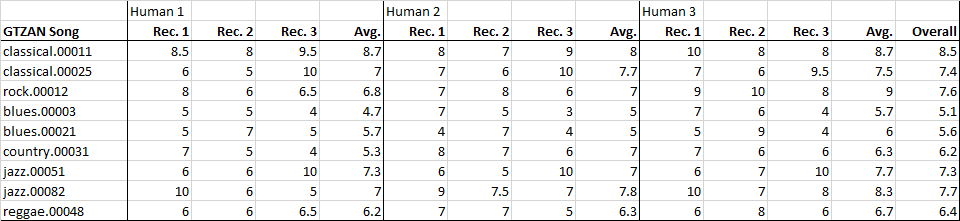

Songs outside the minimusicspeech dataset genres were also used in the recommendation performance evaluation. Interestingly, all three "wildcard" queries (rock, country, and reggae) provided a higher satisfaction score than the blues genre queries. This could possibly be attributed to the similarities blues has with many other genres, most notably jazz.
 
Overall, aside from the blues genre, the algorithm provided decently good music recommendations. The music deemed most similar by the algorithm is represented by the first recommendation, and scored an average of 7.2, leaving the human interpreters generally satisfied with music similarity. 


**1.5: Project Contributions**

Both group members provided great effort toward the project, with each providing great ideas and implementations. Specifically, TV & SR divided the feature extractions equally with TV implementing spectral centroid, and standard deviation of RMS amplitude, and SR implementing spectral rolloff and spectral flatness. Each respective group member developed the normalization for their respective features. SR implemented the distance calculation and evaluation, and TV wrote a large portion of the project synthesis portion, such as details on our algorithm, group approach, and decision explanations. Both TV & SR assisted with algorithm testing, and performance evaluation.

**Example plot of query and recommended songs using Mini Project 1 features**

In [41]:
query_song = es.MonoLoader(filename=audio_path1, sampleRate=Fs)()
query_song_features = find_features(query_song)
print(query_song_features)


[-1.02, 2.734, -0.908, 0.706]


The normalized dataset features are plotted by list index in the scatter plot shown below. The query song features values are plotted by corresponding feature color and denoted as bold "x" marks. The indices for the first, second, and third song recommendations are highlighted. The three recommendations demonstrate a very small distance in STD of RMS amplitude, and medium distances for spectral centroid and spectral rolloff. Spectral flatness seems to provide the largest disparity. Based on this example, and the performance of this particular recommendation, it may be advantageous to place more weight on the STD of RMS amplitude feature, and less weight on the spectral flatness feature in future implementations.

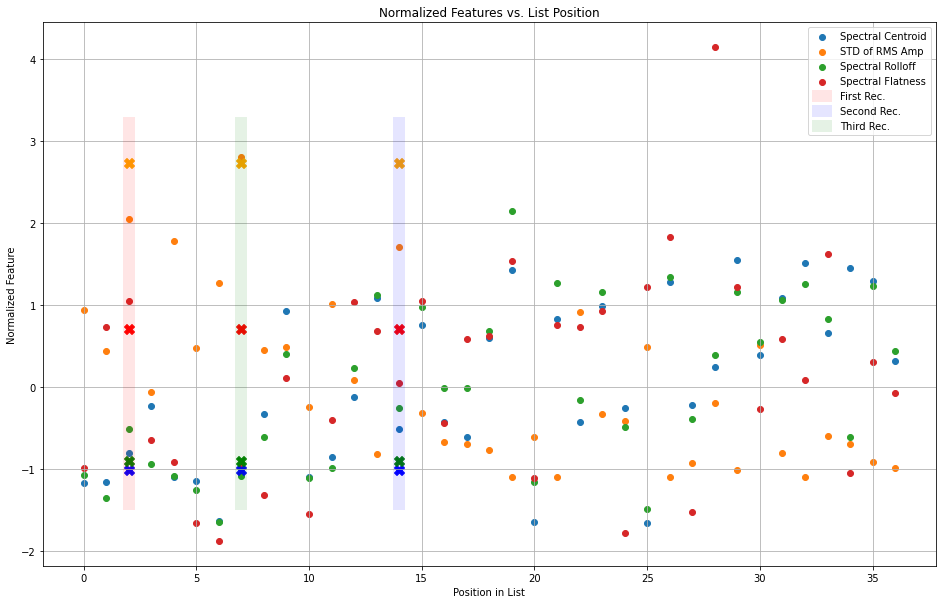

In [42]:
plt.figure(figsize=(16, 10))
plt.scatter(np.arange(0, len(norm_database_features), 1), [a[0] for a in norm_database_features], label='Spectral Centroid')
plt.scatter(np.arange(0, len(norm_database_features), 1), [a[1] for a in norm_database_features], label='STD of RMS Amp')
plt.scatter(np.arange(0, len(norm_database_features), 1), [a[2] for a in norm_database_features], label='Spectral Rolloff')
plt.scatter(np.arange(0, len(norm_database_features), 1), [a[3] for a in norm_database_features], label='Spectral Flatness')
plt.scatter(song_names.index(music_recommendations[0]), query_song_features[0], s=100, marker='X', facecolors='blue')
plt.scatter(song_names.index(music_recommendations[0]), query_song_features[1], s=100, marker='X', facecolors='orange')
plt.scatter(song_names.index(music_recommendations[0]), query_song_features[2], s=100, marker='X', facecolors='green')
plt.scatter(song_names.index(music_recommendations[0]), query_song_features[3], s=100, marker='X', facecolors='red')
plt.scatter(song_names.index(music_recommendations[1]), query_song_features[0], s=100, marker='X', facecolors='blue')
plt.scatter(song_names.index(music_recommendations[1]), query_song_features[1], s=100, marker='X', facecolors='orange')
plt.scatter(song_names.index(music_recommendations[1]), query_song_features[2], s=100, marker='X', facecolors='green')
plt.scatter(song_names.index(music_recommendations[1]), query_song_features[3], s=100, marker='X', facecolors='red')
plt.scatter(song_names.index(music_recommendations[2]), query_song_features[0], s=100, marker='X', facecolors='blue')
plt.scatter(song_names.index(music_recommendations[2]), query_song_features[1], s=100, marker='X', facecolors='orange')
plt.scatter(song_names.index(music_recommendations[2]), query_song_features[2], s=100, marker='X', facecolors='green')
plt.scatter(song_names.index(music_recommendations[2]), query_song_features[3], s=100, marker='X', facecolors='red')
plt.vlines(x=song_names.index(music_recommendations[0]), ymin=-1.5, ymax=3.3, color='r', alpha=0.1, linewidth=12, label='First Rec.')
plt.vlines(x=song_names.index(music_recommendations[1]), ymin=-1.5, ymax=3.3, color='b', alpha=0.1, linewidth=12, label='Second Rec.')
plt.vlines(x=song_names.index(music_recommendations[2]), ymin=-1.5, ymax=3.3, color='g', alpha=0.1, linewidth=12, label='Third Rec.')
plt.xlabel('Position in List')
plt.ylabel('Normalized Feature')
plt.title('Normalized Features vs. List Position')
plt.grid()
plt.legend()
plt.show()